In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Read data
data = pd.read_csv("/Users/Syafiq/Downloads/credit_dataset.csv")
data

,Customer ID,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
0,1,20000,female,univeresity,married,24,3913,3102,689,0,689,0,1
1,2,120000,female,univeresity,single,26,2682,1725,2682,0,1000,1000,1
2,3,90000,female,univeresity,single,34,29239,14027,13559,1518,1500,1000,0
3,4,50000,female,univeresity,married,37,46990,48233,49291,2000,2019,1200,0
4,5,50000,male,univeresity,married,57,8617,5670,35835,2000,36681,10000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1596,480000,female,univeresity,married,35,18214,11031,182123,0,182123,12960,0
1596,1597,150000,female,univeresity,married,37,1184,794,2756,0,2772,0,0
1597,1598,110000,female,post-graduate,single,29,107195,109443,106637,7845,4000,4000,0
1598,1599,240000,male,post-graduate,single,30,7744,7284,11234,7305,11263,10018,0


In [45]:
# No empty data to clean (data cleaning)
print(data.isnull().sum())

Customer ID                   0
Credit Limit                  0
Gender                        0
Education                     0
Marriage Status               0
Age                           0
Bill_Amount1                  0
Bill_Amount2                  0
Bill_Amount3                  0
Pay_Amount1                   0
Pay_Amount2                   0
Pay_Amount3                   0
Default payment next month    0
dtype: int64


<Axes: >

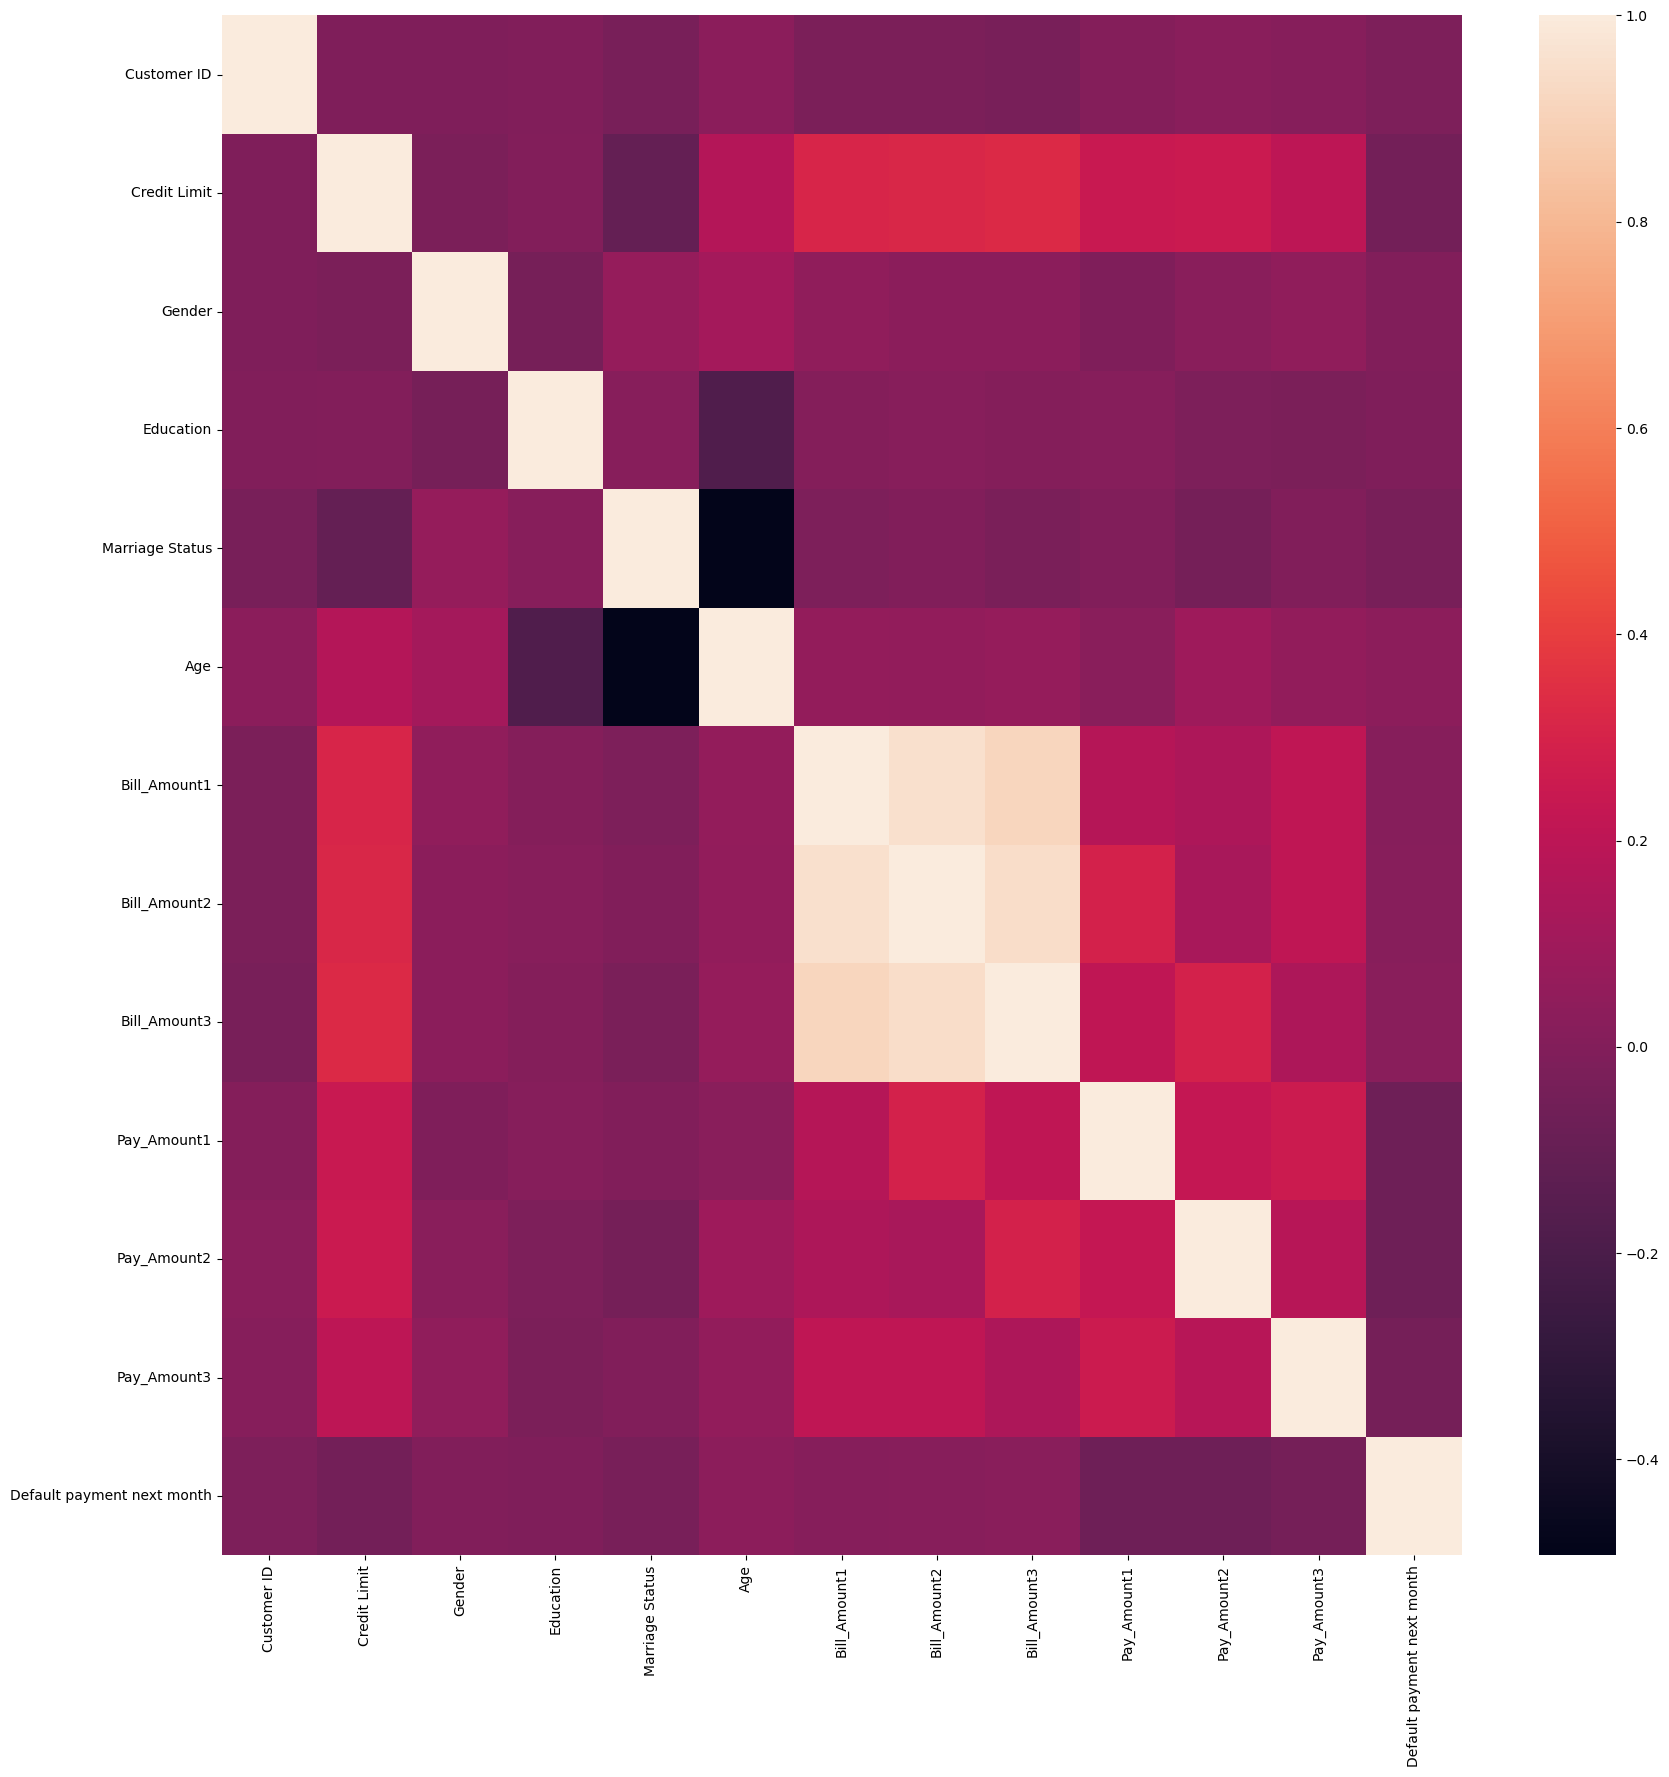

In [23]:
# heatmap for data exploration 
plt.figure(figsize=(20,20))
sns.heatmap(data.corr())

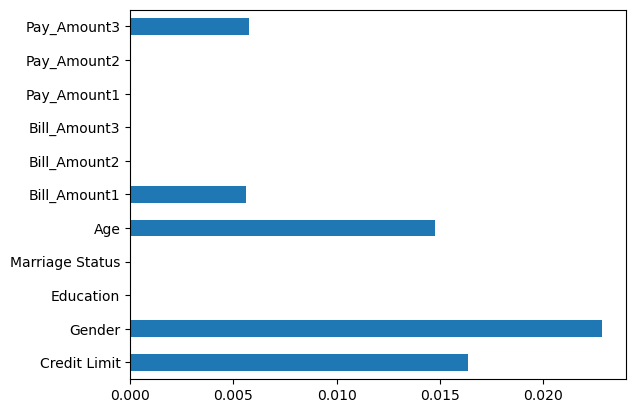

      Bill_Amount1  Pay_Amount3  Age  Credit Limit  Gender
0             3913            0   24         20000       0
1             2682         1000   26        120000       0
2            29239         1000   34         90000       0
3            46990         1200   37         50000       0
4             8617        10000   57         50000       1
...            ...          ...  ...           ...     ...
1595         18214        12960   35        480000       0
1596          1184            0   37        150000       0
1597        107195         4000   29        110000       0
1598          7744        10018   30        240000       1
1599         47853          500   33         50000       1

[1600 rows x 5 columns]


In [2]:
# LabelEncoder to convert categorical text data 
# I represent my data as features by dropping irrelevant collums
# converting with labelencoder
label_encoder = LabelEncoder()

data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Marriage Status'] = label_encoder.fit_transform(data['Marriage Status'])

X = data.drop('Customer ID',axis=1)
X = X.drop('Default payment next month',axis=1)
y = data['Default payment next month']
# Feature Selection
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)
X_train.shape,X_test.shape
%matplotlib inline 

importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances,X.columns[0:len(X.columns)])
feat_importances.plot(kind='barh')
plt.show()# Encode categorical variables
X1 = X.iloc[:, np.argsort(feat_importances)[6:]]
print(X1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Calculate different score for different models
def model_s(model_name, model, X_train_scaled, X_val_scaled,
                X_test_scaled, y_train, y_val, y_test, test=False):
    
    my_model = model
    my_model.fit(X_train_scaled,y_train)
    print(f'{model_name} accuracy score: {my_model.score(X_val_scaled,y_val):.4}\n')

    if test:
        
        print(f'{model_name} accuracy score: {my_model.score(X_test_scaled,y_test):.4}\n')

    return my_model
  
knn = model_s('KNN', KNeighborsClassifier(n_neighbors=5),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=False)

lr = model_s('LogReg', LogisticRegression(penalty='none'),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=False)

rf = model_s('RF', RandomForestClassifier(),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=False)
        

svc = model_s('SVM', SVC(probability=True),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=False)

KNN accuracy score: 0.7578

LogReg accuracy score: 0.793



D:\ana\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


RF accuracy score: 0.7734

SVM accuracy score: 0.793



In [24]:
# Calculate kfold cross val score for different models

models = {
    'Logistic Regression': LogisticRegression(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'SVC': SVC()
}

kf = KFold(n_splits=6, shuffle=True, random_state=5)

for name, model in models.items():
    cv_scores = cross_val_score(model, X1, y, cv=kf)
    avg_score = np.mean(cv_scores)
    print("Model:", name)
    print("Average Score:", avg_score)
    print()


Model: Logistic Regression
Average Score: 0.7875165441694123

Model: K Neighbors Classifier
Average Score: 0.7331531074878206

Model: Random Forest Classifier
Average Score: 0.7537687852590277

Model: SVC
Average Score: 0.7875165441694123



In [42]:
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
  
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(X_train_scaled, y_train)
  train_accuracies[neighbor] = knn.score(X_train_scaled, y_train)
  test_accuracies[neighbor] = knn.score(X_test_scaled, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8349609375, 3: 0.82421875, 4: 0.8046875, 5: 0.8017578125, 6: 0.796875, 7: 0.7919921875, 8: 0.796875, 9: 0.7958984375, 10: 0.796875, 11: 0.794921875, 12: 0.79296875} 
 {1: 0.634375, 2: 0.746875, 3: 0.709375, 4: 0.746875, 5: 0.721875, 6: 0.75, 7: 0.7375, 8: 0.7625, 9: 0.7625, 10: 0.76875, 11: 0.765625, 12: 0.771875}


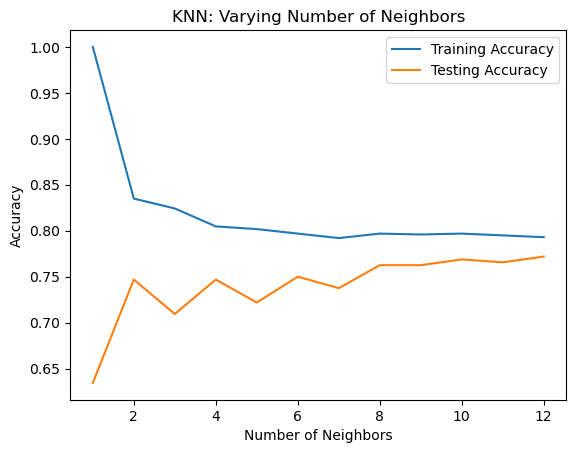

In [11]:
# Check for overfitting
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [13]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train_scaled, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test_scaled)[:, 1]

print(y_pred_probs[:10])

[0.09791036 0.21329585 0.17975231 0.25159079 0.20029715 0.21686219
 0.18026015 0.14072729 0.19035508 0.19931818]


In [ ]:
# Tune hyperparameters by finding the best params using gridsearchcv and using the best params to make predictions

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_
print(best_params_knn)
print(best_score_knn)

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
0.7812482065997131


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid_lr = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression classifier
lr = LogisticRegression()

# Perform grid search with cross-validation
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_
print(best_params_lr)
print(best_score_lr)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.7910186513629842


In [25]:
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 7, weights ='uniform')

knn.fit(X_train_scaled, y_train)

print(knn.score(X_test_scaled, y_test))

0.740625


Accuracy: 0.721875
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       247
           1       0.17      0.05      0.08        73

    accuracy                           0.72       320
   macro avg       0.47      0.49      0.46       320
weighted avg       0.63      0.72      0.66       320

Confusion Matrix:
[[227  20]
 [ 69   4]]


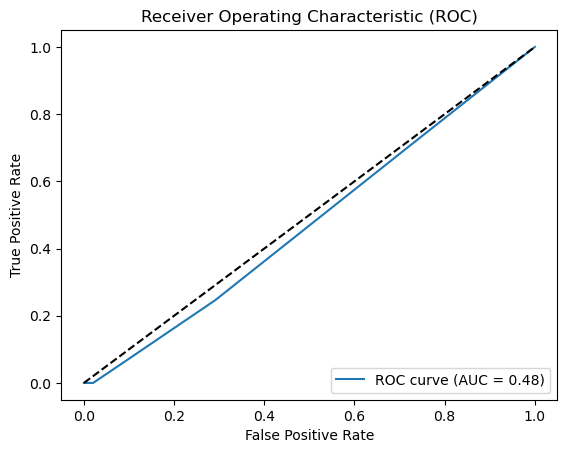

In [43]:
knn = KNeighborsClassifier()

# Fit the model on the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate ROC curve and AUC score
y_scores = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()








In [44]:
print("Predictions from baseline model:",y_pred[:10])
print("Actual:",y_test[:10])

Predictions from baseline model: [0 0 0 0 0 0 0 0 0 0]
Actual: 1073    0
326     1
1557    0
918     0
974     1
473     0
1005    0
737     0
1426    0
53      0
Name: Default payment next month, dtype: int64


Accuracy: 0.771875
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       247
           1       0.00      0.00      0.00        73

    accuracy                           0.77       320
   macro avg       0.39      0.50      0.44       320
weighted avg       0.60      0.77      0.67       320

Confusion Matrix:
[[247   0]
 [ 73   0]]


D:\ana\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ana\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ana\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


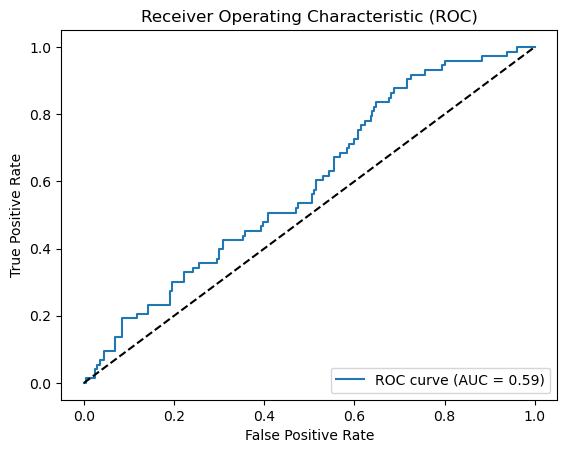

In [31]:
logreg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate ROC curve and AUC score
y_scores = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.740625
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       247
           1       0.14      0.03      0.05        73

    accuracy                           0.74       320
   macro avg       0.46      0.49      0.45       320
weighted avg       0.63      0.74      0.67       320

Confusion Matrix:
[[235  12]
 [ 71   2]]


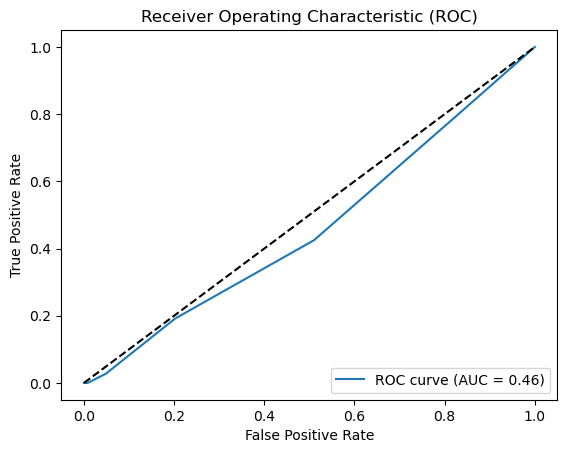

In [38]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='uniform')

# Fit the model on the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate ROC curve and AUC score
y_scores = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()







In [41]:
# An example of my prediction task 
# My predictions were quite accurate and is 8/10 correct in predicting the values
# Thus, i think my model did its job
# I also did the same above with a baseline model . However to compare these 2, we need to compare it with more values instead of 10
# But based on the numbers, tuned model can predict more accurately but lesser 1s ass compared to baseline 
# Based on the confusion matrix it has 71 false positive and 12 false negative. These are the errors
print("Predictions from tuned model:",y_pred[:10])
print("Actual:",y_test[:10])

Predictions from tuned model: [0 0 0 0 0 0 0 0 0 0]
Actual: 1073    0
326     1
1557    0
918     0
974     1
473     0
1005    0
737     0
1426    0
53      0
Name: Default payment next month, dtype: int64


Accuracy: 0.771875
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       247
           1       0.00      0.00      0.00        73

    accuracy                           0.77       320
   macro avg       0.39      0.50      0.44       320
weighted avg       0.60      0.77      0.67       320

Confusion Matrix:
[[247   0]
 [ 73   0]]


D:\ana\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ana\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ana\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


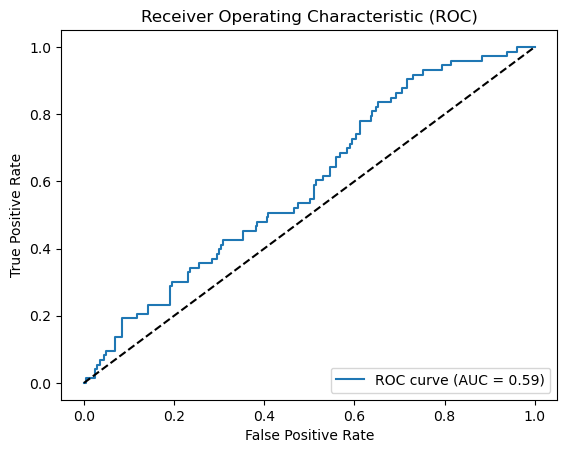

In [29]:
logreg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate ROC curve and AUC score
y_scores = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# The best model to use is KNN as it can predict 1s unlike logistic regression. Its accuracy was also able to increase after tuning

In [ ]:
y_pred = ridge.predict(X_test_scaled)
print("Predictions from baseline model:",y_pred[:2])
print("Predictions from tuned model:",y_pred_t[:2])
print("Actual:",y_test[:2])